# Visualizations 3

## bar chart of region distribution

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path for folder

In [6]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [8]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_unique_no_products.pkl'))

In [9]:
instacart.shape

(3064375, 18)

In [56]:
instacart.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_time', 'days_since_prior_order', 'Gender', 'State', 'Age',
       'n_dependants', 'fam_status', 'income', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag'],
      dtype='object')

### Creating a subset with only columns of interest

In [12]:
region = instacart[['order_id', 'user_id', 'Region']]

In [13]:
region.shape

(3064375, 3)

In [14]:
region.head()

,order_id,user_id,Region
0,2,202279,West
9,3,205970,West
17,4,178520,Northeast
30,5,156122,South
56,6,22352,Midwest


In [15]:
region['Region'].value_counts()

Region
South        1021379
West          783505
Midwest       719292
Northeast     540199
Name: count, dtype: int64

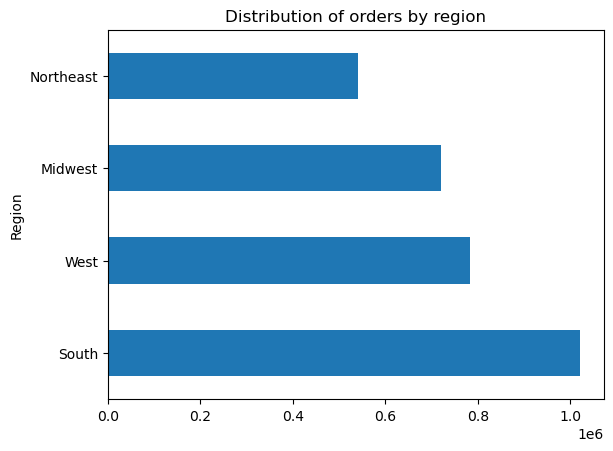

In [16]:
# Creating a bar chart with region distribution

bar = region['Region'].value_counts().plot.barh(title="Distribution of orders by region")

In [17]:
# exporting plot

bar.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'distribution_order_region.png'))

### Creating a chart with distribution of customers by region

In [58]:
cust_region = instacart[['user_id', 'Region', 'order_cost', 'products_per_order', 'loyalty_flag' ]]

In [60]:
cust_region.shape

(3064375, 5)

In [62]:
# Creating a subset withou duplicates --- only unique user_ids

cust_region_nodups = cust_region.drop_duplicates()

In [64]:
cust_region_nodups.shape

(2958921, 5)

In [66]:
cust_region_nodups['Region'].value_counts()

Region
South        986639
West         756154
Midwest      694828
Northeast    521300
Name: count, dtype: int64

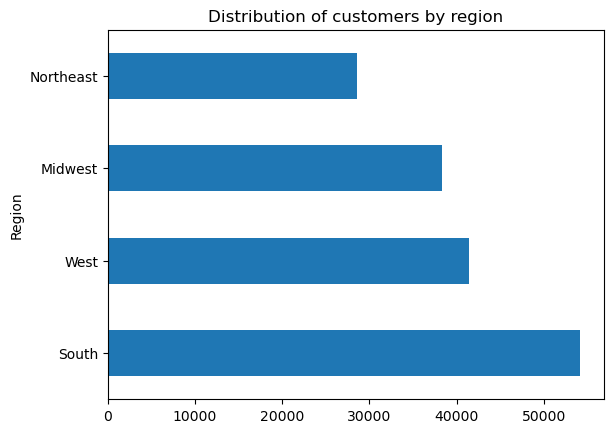

In [24]:
# Creating a bar chart with region distribution of customers

bar2 = cust_region_nodups['Region'].value_counts().plot.barh(title="Distribution of customers by region")

In [25]:
# exporting plot

bar2.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'distribution_cust_region.png'))

### Creating a chart with age groups and regions

In [27]:
age_x_region = instacart[['user_id', 'Region', 'age_group']]

In [28]:
# Creating a subset withou duplicates --- only unique user_ids

age_x_region_nodups = age_x_region.drop_duplicates()

In [29]:
age_x_region_nodups.shape

(162631, 3)

<Axes: xlabel='Region', ylabel='count'>

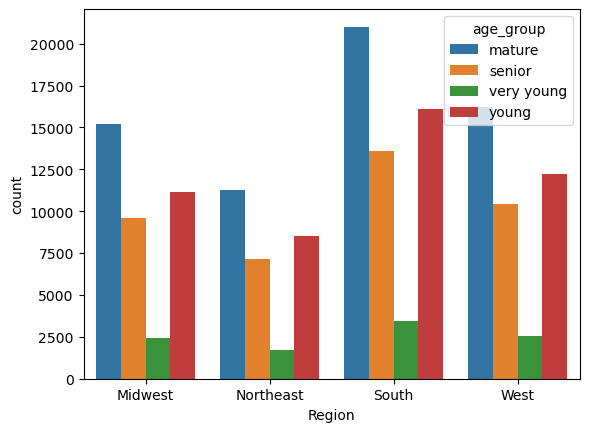

In [72]:
# Stacked bar chart
sns.barplot(x='Region', y='count', hue='age_group', data=age_x_region_nodups.groupby(['Region', 'age_group']).size().reset_index(name='count'))

<Axes: xlabel='Region', ylabel='count'>

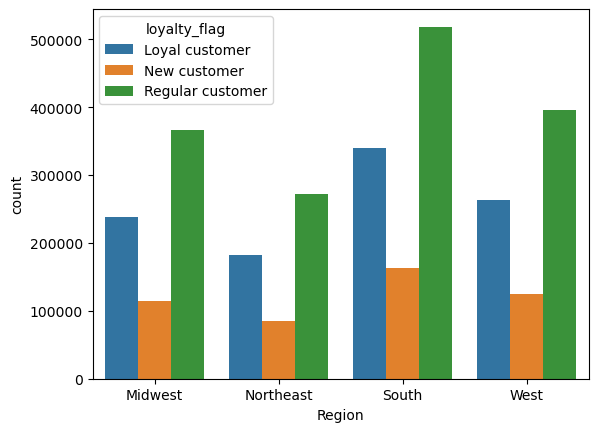

In [76]:
# Stacked bar chart
sns.barplot(x='Region', y='count', hue='loyalty_flag', data=cust_region.groupby(['Region', 'loyalty_flag']).size().reset_index(name='count'))

In [80]:
cust_region.groupby('Region').agg({'products_per_order':['median', 'min', 'max']})

products_per_order         
                      median min  max
Region                               
Midwest                  8.0   1  109
Northeast                8.0   1  145
South                    8.0   1  137
West                     8.0   1  113

In [82]:
cust_region.groupby('Region').agg({'order_cost':['median', 'min', 'max']})

order_cost             
              median  min     max
Region                           
Midwest         64.4  0.0   751.1
Northeast       64.5  0.0  1092.2
South           64.3  0.0   875.0
West            64.6  0.0   852.5

In [31]:
plt.savefig('/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis/Analysis/Final Visualization/age_region.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
order_cost_loyalty.groupby('loyalty_flag').agg({'products_per_order':['median', 'min', 'max']})